EXPLORATORY DATA ANALYSIS - BLINKIT

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Blinkit data\CSV data\BlinkIT Grocery Data.csv")

In [3]:
df.head(20)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
5,low fat,FDS52,Frozen Foods,2020,OUT017,Tier 2,Small,Supermarket Type1,0.005505,8.89,102.4016,5.0
6,Low Fat,NCU05,Health and Hygiene,2011,OUT010,Tier 3,Small,Grocery Store,0.098312,11.80,81.4618,5.0
7,Low Fat,NCD30,Household,2015,OUT045,Tier 2,Small,Supermarket Type1,0.026904,19.70,96.0726,5.0
8,Low Fat,FDW20,Fruits and Vegetables,2000,OUT013,Tier 3,High,Supermarket Type1,0.024129,20.75,124.1730,5.0
9,Low Fat,FDX25,Canned,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0


In [4]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Total Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [5]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [6]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [7]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [9]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [10]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

BUSINESS REQUIREMENTS

KPI's Requirements

In [11]:
KPIs = df.agg({
    'Total Sales': ['sum', 'mean', 'count'],
    'Rating': 'mean'
})


In [12]:
print("KPI Metrics:")
print(KPIs.round(2))

KPI Metrics:
       Total Sales  Rating
sum     1201681.48     NaN
mean        140.99    3.97
count      8523.00     NaN


##### **CHARTS REQUIREMENTS**


#### **Total Sales by Fat Conttent**

In [13]:
sales_by_fat_content = df.groupby('Item Fat Content').agg({'Total Sales':['sum','mean','count'],'Rating': 'mean'}).reset_index()
sales_by_fat_content.columns = ['Item Fat Content', 'Total Sales Sum', 'Total Sales Mean', 'Total Sales Count','Rating Mean']

In [14]:
sales_by_fat_content

,Item Fat Content,Total Sales Sum,Total Sales Mean,Total Sales Count,Rating Mean
0,Low Fat,776319.6784,140.714098,5517,3.966286
1,Regular,425361.8024,141.504259,3006,3.965070


Text(0.5, 1.0, 'Total Sales Distribution by Fat Content')

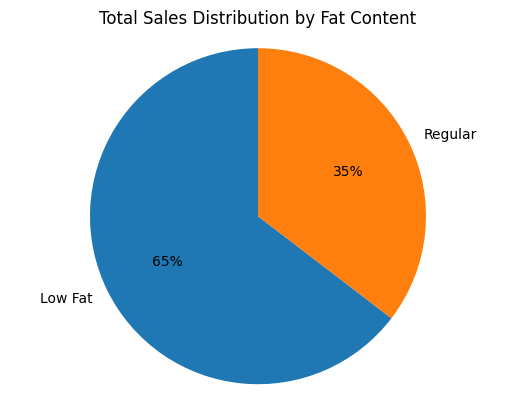

In [15]:
plt.pie(sales_by_fat_content['Total Sales Sum'], labels=sales_by_fat_content['Item Fat Content'], autopct='%.0f%%',startangle=90)
plt.axis('equal')
plt.title('Total Sales Distribution by Fat Content')    

#### **Total Sales by Item type**

In [16]:
sales_by_item_type = df.groupby('Item Type').agg({'Total Sales':['sum','mean','count'],'Rating': 'mean'}).sort_values(('Total Sales', 'sum'),ascending = False).reset_index()
sales_by_item_type.columns = ['Item Type', 'Total Sales Sum', 'Total Sales Mean', 'Total Sales Count','Rating Mean']

In [17]:
sales_by_item_type 

,Item Type,Total Sales Sum,Total Sales Mean,Total Sales Count,Rating Mean
0,Fruits and Vegetables,178124.0810,144.581235,1232,3.956169
1,Snack Foods,175433.9204,146.194934,1200,3.948917
2,Household,135976.5254,149.424753,910,3.998681
3,Frozen Foods,118558.8814,138.503366,856,3.971145
4,Dairy,101276.4596,148.499208,682,3.965836
5,Canned,90706.7270,139.763832,649,3.994299
6,Baking Goods,81894.7364,126.380766,648,3.983025
7,Health and Hygiene,68025.8388,130.818921,520,3.986154
8,Meat,59449.8638,139.882032,425,4.023059
9,Soft Drinks,58514.1650,131.492506,445,3.920674


In [18]:
Sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

In [19]:
Sales_by_type

Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9204
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4596
Canned                    90706.7270
Baking Goods              81894.7364
Health and Hygiene        68025.8388
Meat                      59449.8638
Soft Drinks               58514.1650
Breads                    35379.1198
Hard Drinks               29334.6766
Others                    22451.8916
Starchy Foods             21880.0274
Breakfast                 15596.6966
Seafood                    9077.8700
Name: Total Sales, dtype: float64

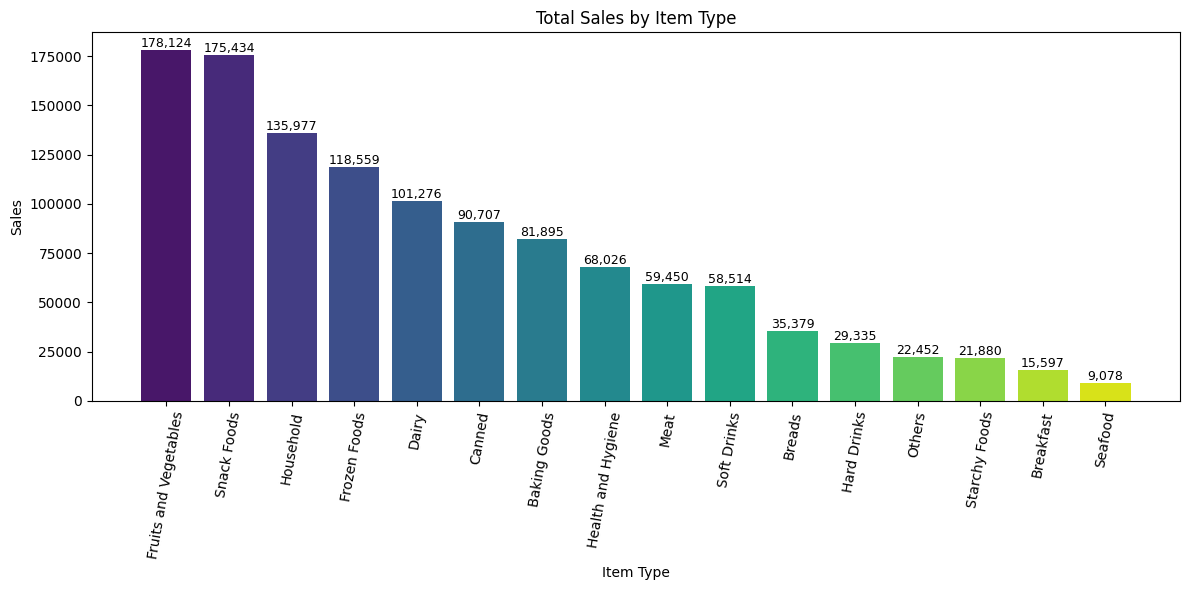

In [21]:
plt.figure(figsize=(12,6))
Bars = plt.bar(sales_by_item_type['Item Type'], sales_by_item_type['Total Sales Sum'], color=sns.color_palette('viridis', len(sales_by_item_type)))
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.title('Total Sales by Item Type')
plt.xticks(rotation = 80)


for bar in Bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,   
        height,                           
        f'{height:,.0f}',                   
        ha='center', va='bottom', fontsize=9
    )
plt.tight_layout()
plt.show()


### **Fat Content by Outlet for Total Sales**

In [22]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [23]:
grouped = (
    df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum()
      .unstack()
      .reset_index()
)
grouped.head()


Item Fat Content,Outlet Location Type,Low Fat,Regular
0,Tier 1,215047.9126,121349.8994
1,Tier 2,254464.7734,138685.8682
2,Tier 3,306806.9924,165326.0348


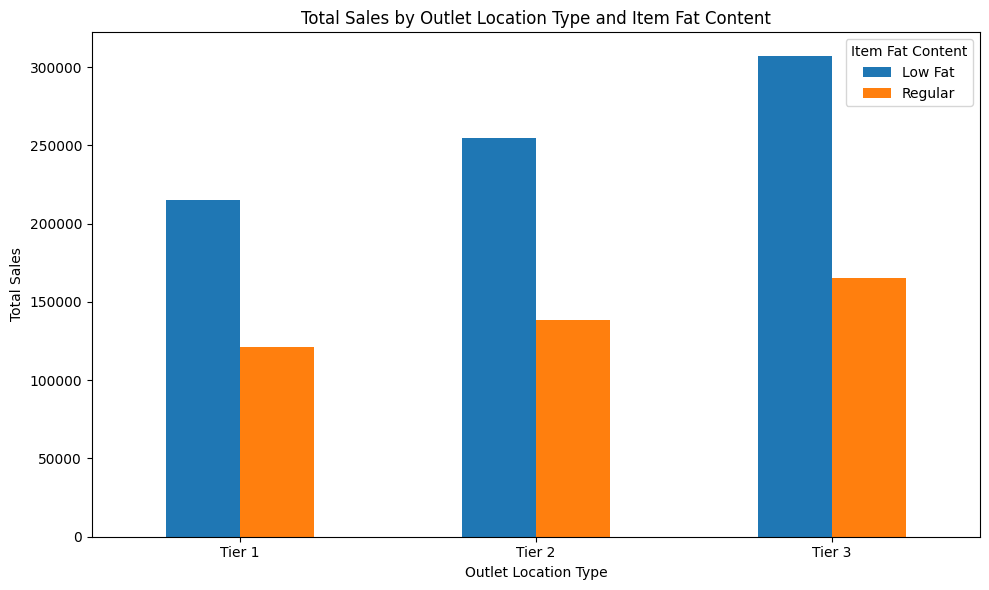

In [27]:
grouped.plot(kind='bar', figsize=(10,6),x='Outlet Location Type')
plt.title('Total Sales by Outlet Location Type and Item Fat Content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)  
plt.tight_layout()
plt.show()


### **Total Sales by Outlet Establishment**


In [29]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [46]:
Total_Sales_by_Outlet_Establishment = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

In [47]:
Total_Sales_by_Outlet_Establishment

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Total Sales, dtype: float64

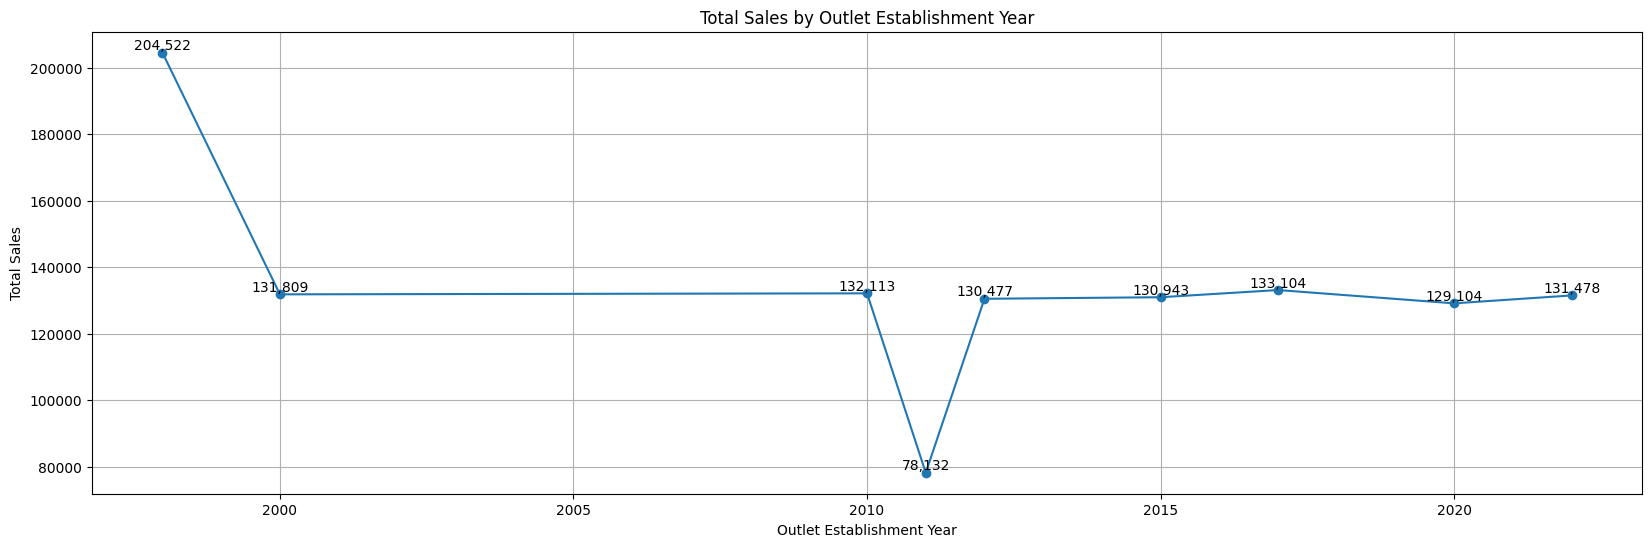

In [65]:
plt.figure(figsize=(20,6))
plt.plot(Total_Sales_by_Outlet_Establishment.index, Total_Sales_by_Outlet_Establishment.values, marker='o')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
for year, sales in zip(Total_Sales_by_Outlet_Establishment.index, Total_Sales_by_Outlet_Establishment.values):
    plt.text(year, sales, f'{sales:,.0f}', ha='center', va='bottom')
plt.grid()
plt.show()




### ** Percentage of Sales by Outlet Size**


In [66]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [67]:
Total_Sales_by_Outlet_size = df.groupby('Outlet Size')['Total Sales'].sum()

In [68]:
Total_Sales_by_Outlet_size

Outlet Size
High      248991.5840
Medium    507895.7284
Small     444794.1684
Name: Total Sales, dtype: float64

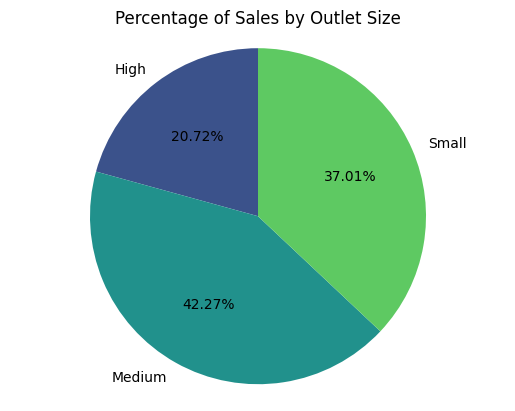

In [73]:
colors = sns.color_palette('viridis', len(Total_Sales_by_Outlet_size))
plt.Figure(figsize=(4,4))
plt.pie(Total_Sales_by_Outlet_size, labels=Total_Sales_by_Outlet_size.index, autopct='%.2f%%', startangle=90,colors=colors)
plt.axis('equal')
plt.title('Percentage of Sales by Outlet Size')
plt.show()

### **Sales by Outlet Location**

In [98]:
Total_Sales_by_Outlet_location = df.groupby('Outlet Location Type')['Total Sales'].sum().sort_values(ascending=False).reset_index()

In [99]:
Total_Sales_by_Outlet_location

,Outlet Location Type,Total Sales
0,Tier 3,472133.0272
1,Tier 2,393150.6416
2,Tier 1,336397.8120


In [100]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

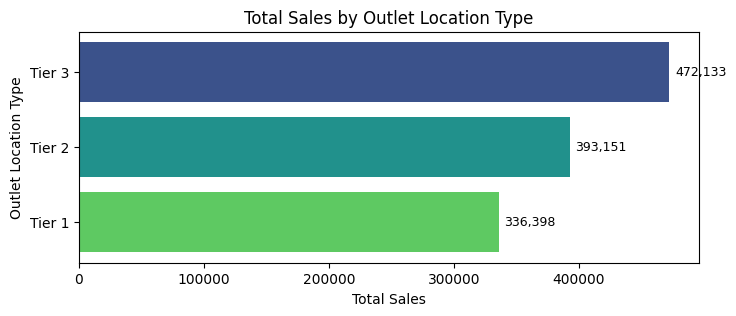

In [ ]:
plt.figure(figsize=(8,3))

bars = plt.barh(
    Total_Sales_by_Outlet_location['Outlet Location Type'],
    Total_Sales_by_Outlet_location['Total Sales'],
    color=sns.color_palette('viridis', len(Total_Sales_by_Outlet_location))
)

plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")
plt.title("Total Sales by Outlet Location Type")


for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (width * 0.01),     \
        bar.get_y() + bar.get_height()/2,
        f"{width:,.0f}",
        va='center',
        fontsize=9
    )
plt.gca().invert_yaxis()
plt.show()


C:\Users\SUGYANI\AppData\Local\Temp\ipykernel_19728\3205179312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


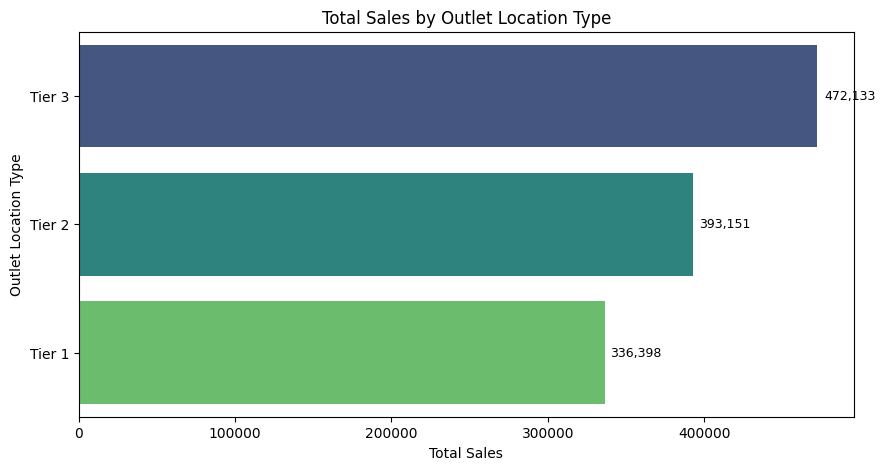

In [ ]:
plt.figure(figsize=(10,5))

ax = sns.barplot(
    data=Total_Sales_by_Outlet_location,
    y='Outlet Location Type',
    x='Total Sales',
    palette='viridis'
)

plt.title("Total Sales by Outlet Location Type")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")

# ---- Add Data Labels ----
for i, v in enumerate(Total_Sales_by_Outlet_location['Total Sales']):
    ax.text(
        v + (v * 0.01),   
        i,                
        f"{v:,.0f}",
        va='center',
        fontsize=9
    )

plt.show()


In [ ]:
Fat_Content_by_Outlet_for_Total_Sales =  df.groupby(['Outlet Location Type', 'Item Fat Content']).agg({'Total Sales':['sum','mean','count'],'Rating': 'mean'}).unstack().reset_index()

In [ ]:
Fat_Content_by_Outlet_for_Total_Sales.head()

Outlet Location Type  Total Sales                           \
                                               sum                     mean   
Item Fat Content                           Low Fat      Regular     Low Fat   
0                              Tier 1  215047.9126  121349.8994  139.641502   
1                              Tier 2  254464.7734  138685.8682  140.665989   
2                              Tier 3  306806.9924  165326.0348  141.516140   

                                                Rating            
                               count              mean            
Item Fat Content     Regular Low Fat Regular   Low Fat   Regular  
0                 143.101296    1540     848  3.980000  3.971698  
1                 142.096176    1809     976  3.967828  3.951230  
2                 139.869742    2168    1182  3.955258  3.971743